# Comparative Data Analysis Of LA-Crimes

#               -- Impact of major events like covid, elections on criminal activities

Los Angeles often referred to by its initials L.A. is the commercial, financial, and cultural center of Southern California. Los Angeles is the largest city in the state of California, the second-most populous city in the United States after New York City, and one of the world's most populous megacities. With a population of roughly 3.9 million residents within the city limits as of 2020,Los Angeles is known for its Mediterranean climate, ethnic and cultural diversity, being the home of the Hollywood film industry, and its sprawling metropolitan area. 

Race, ethnicity, and national origin
Hispanic or Latino (of any race): 47.5%
Non-Hispanic Whites: 29.4%
Other: 25.2%
Asian: 10.7%
Black or African American: 9.8%
Two or more races: 2.8%
Native American: 0.5%
Native Hawaiian and Other Pacific Islander: 0.2%

This summer (2020) saw a historic rise of demonstrations across the United States calling to 'Defund the Police.' Los Angeles Mayor, Eric Garcetti, reversed the trend of increasing police spending for the first time in years by reducing the Los Angeles Police Department (LAPD) budget by $150 million (NY Times).

# Business Problem

Los Angeles has the third largest police department in the country, with jurisdiction over almost 4 million people. 
The People’s Budget LA and other community movements have worked to push local government to search for alternative social service solutions to public safety. We set out to justify this divestment with time series predicting and forecasting. Through additional analysis of the data we identify which areas and populations in LA have been hit the hardest by crime in the last 9 years, so that budget resources can be reallocated to social services in those high-impact communities.

A state of emergency was declared in the state on March 4, 2020. A mandatory statewide stay-at-home order was issued on March 19, 2020, that was ended on January 25, 2021. On April 6, 2021, the state announced plans to fully reopen the economy by June 15, 2021.

# Objectives

To understand crime rate in Los Angeles in the last 3 years (2020 - Present).
What kind of crimes are most prevalent in Los Angeles?
Are there certain times when crime is more likely to occur? If so, when?
Find if there is any major difference in the regions of Los Angeles in crime rate.
Try to find associations / patterns in crime analysis with respect to another important criteria in Los Angeles.


Data Sources -

The data for this analysis is taken from source:


# Understanding the data:

The dataset "LA_crime_data" has more than 710000 records with over 28 variables. Each row is a record of information on crime that was reported, where it occurred, when it occurred, what the crime was, and information on the victims of the crime. The crime data information is daily crime data collected from 1st January of 2020 to recent 2nd week of June,2023.

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd

# Importing graphing libraries

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pylab import rcParams


In [3]:
# ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')


In [4]:
data=pd.read_csv("C:/Users/skris/Downloads/Crime_Data_from_2020_to_Present.csv")

In [5]:
data.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [6]:
data.shape

(739687, 28)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739687 entries, 0 to 739686
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           739687 non-null  int64  
 1   Date Rptd       739687 non-null  object 
 2   DATE OCC        739687 non-null  object 
 3   TIME OCC        739687 non-null  int64  
 4   AREA            739687 non-null  int64  
 5   AREA NAME       739687 non-null  object 
 6   Rpt Dist No     739687 non-null  int64  
 7   Part 1-2        739687 non-null  int64  
 8   Crm Cd          739687 non-null  int64  
 9   Crm Cd Desc     739687 non-null  object 
 10  Mocodes         638226 non-null  object 
 11  Vict Age        739687 non-null  int64  
 12  Vict Sex        643115 non-null  object 
 13  Vict Descent    643109 non-null  object 
 14  Premis Cd       739677 non-null  float64
 15  Premis Desc     739266 non-null  object 
 16  Weapon Used Cd  256726 non-null  float64
 17  Weapon Des

In [8]:
data.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           101461
Vict Age               0
Vict Sex           96572
Vict Descent       96578
Premis Cd             10
Premis Desc          421
Weapon Used Cd    482961
Weapon Desc       482961
Status                 0
Status Desc            0
Crm Cd 1               8
Crm Cd 2          684857
Crm Cd 3          737854
Crm Cd 4          739633
LOCATION               0
Cross Street      620543
LAT                    0
LON                    0
dtype: int64

# Data cleaning

We are validating all the columns based on the values that are mandotory to be present in the columns.                            
If the values are out of the list, we remove those values while cleaning.                                                                
We are removing all the columns which do not play important role in our analysis.

In [9]:
data.drop(['DR_NO','Mocodes','Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street'], axis=1, inplace=True)


In [10]:
data.dropna(subset=['Premis Cd'], inplace=True)



In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739677 entries, 0 to 739686
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date Rptd       739677 non-null  object 
 1   DATE OCC        739677 non-null  object 
 2   TIME OCC        739677 non-null  int64  
 3   AREA            739677 non-null  int64  
 4   AREA NAME       739677 non-null  object 
 5   Rpt Dist No     739677 non-null  int64  
 6   Part 1-2        739677 non-null  int64  
 7   Crm Cd          739677 non-null  int64  
 8   Crm Cd Desc     739677 non-null  object 
 9   Vict Age        739677 non-null  int64  
 10  Vict Sex        643114 non-null  object 
 11  Vict Descent    643108 non-null  object 
 12  Premis Cd       739677 non-null  float64
 13  Premis Desc     739266 non-null  object 
 14  Weapon Used Cd  256726 non-null  float64
 15  Weapon Desc     256726 non-null  object 
 16  Status          739677 non-null  object 
 17  Status Des

In [12]:
data.columns

Index(['Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No',
       'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Vict Age', 'Vict Sex',
       'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd',
       'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT',
       'LON'],
      dtype='object')

In [13]:
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])

In [14]:
data['Date Rptd']= pd.to_datetime(data['Date Rptd'])

In [15]:
data.head(5)

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,...,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,...,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978
1,2020-01-02,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,...,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545
2,2020-04-14,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,...,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474
3,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019
4,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,...,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468


# Exploratory Data Analysis

In [16]:
data['Year'] = data['DATE OCC'].apply(lambda x: x.year)
data['Month'] = data['DATE OCC'].apply(lambda x: x.month)

data['Weekday'] = data['DATE OCC'].apply(lambda x: x.weekday())
data['DoM'] = data['DATE OCC'].apply(lambda x: x.day)

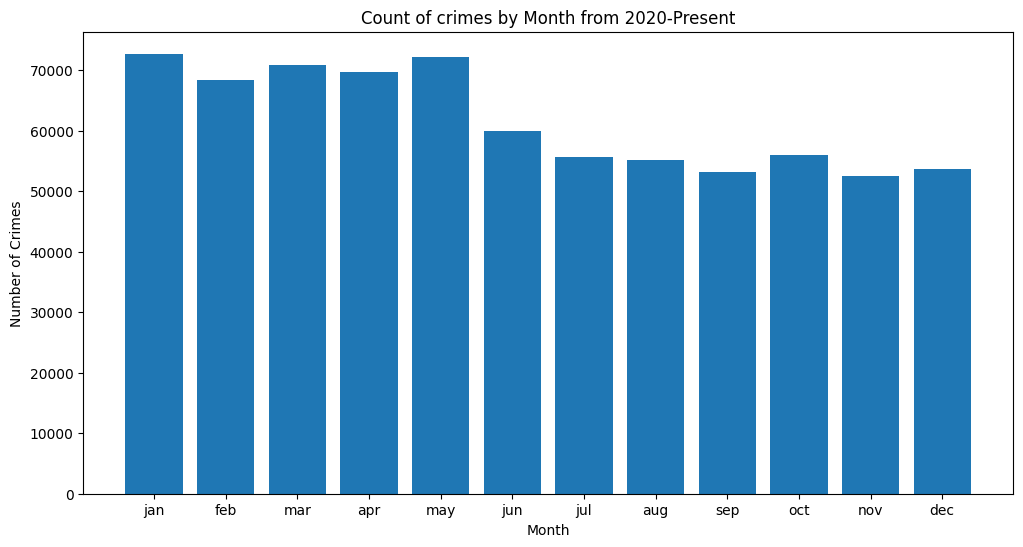

In [17]:
monthly_counts = data.groupby('Month').size()
plt.figure(figsize=(12,6))
plt.xticks(range(1,13), 'jan feb mar apr may jun jul aug sep oct nov dec'.split());
# Create a bar chart using matplotlib
plt.bar(monthly_counts.index, monthly_counts.values)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Count of crimes by Month from 2020-Present')

# Display the chart
plt.show()

Text(0.5, 1.0, 'monthly counts of theft')

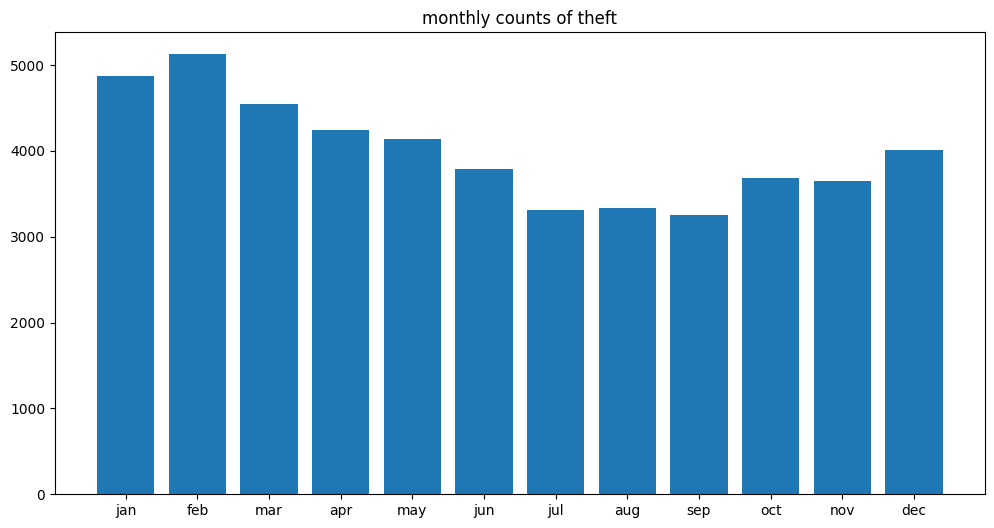

In [18]:
#And let's plot some of them! For instance, are there any monthly trends we notice in crimes related to homicide?

theft_monthly_count = data[data['Crm Cd'] == 354]['Month'].value_counts().sort_index()


plt.figure(figsize=(12,6))
plt.bar(range(1,13), theft_monthly_count)
plt.xticks(range(1,13), 'jan feb mar apr may jun jul aug sep oct nov dec'.split());
plt.title('monthly counts of theft')

In [19]:
data.head(10)

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,...,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Year,Month,Weekday,DoM
0,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,...,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,1,2,8
1,2020-01-02,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,...,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020,1,2,1
2,2020-04-14,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,...,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2020,2,3,13
3,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,...,IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020,1,2,1
4,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,...,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2020,1,2,1
5,2020-01-02,2020-01-01,30,1,Central,163,1,121,"RAPE, FORCIBLE",25,...,IC,Invest Cont,121.0,700 S BROADWAY,34.0452,-118.2534,2020,1,2,1
6,2020-01-02,2020-01-02,1315,1,Central,161,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,...,IC,Invest Cont,442.0,700 S FIGUEROA ST,34.0483,-118.2631,2020,1,3,2
7,2020-01-04,2020-01-04,40,1,Central,155,2,946,OTHER MISCELLANEOUS CRIME,0,...,IC,Invest Cont,946.0,200 E 6TH ST,34.0448,-118.2474,2020,1,5,4
8,2020-01-04,2020-01-04,200,1,Central,101,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",23,...,IC,Invest Cont,341.0,700 BERNARD ST,34.0677,-118.2398,2020,1,5,4
9,2020-06-19,2020-05-26,1925,17,Devonshire,1708,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0,...,AO,Adult Other,341.0,11900 BALBOA BL,34.2864,-118.5021,2020,5,1,26


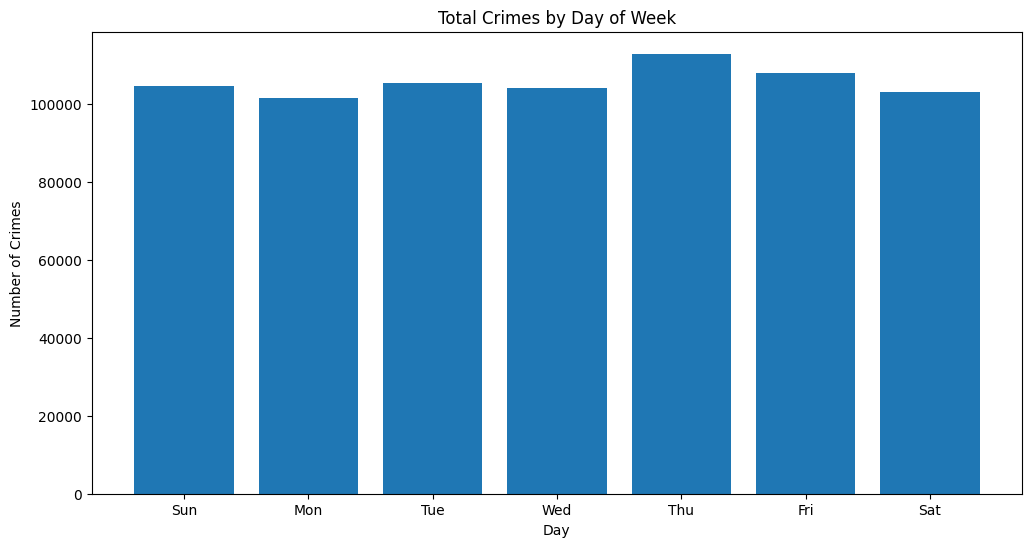

In [20]:
weekly_counts = data.groupby('Weekday').size()
plt.figure(figsize=(12,6))
plt.xticks(range(0,7), 'Sun Mon Tue Wed Thu Fri Sat '.split());
# Create a bar chart using matplotlib
plt.bar(weekly_counts.index, weekly_counts.values)

# Add labels and title
plt.xlabel('Day')
plt.ylabel('Number of Crimes')
plt.title('Total Crimes by Day of Week')

# Display the chart
plt.show()

In [21]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('DoM').apply(count_rows)

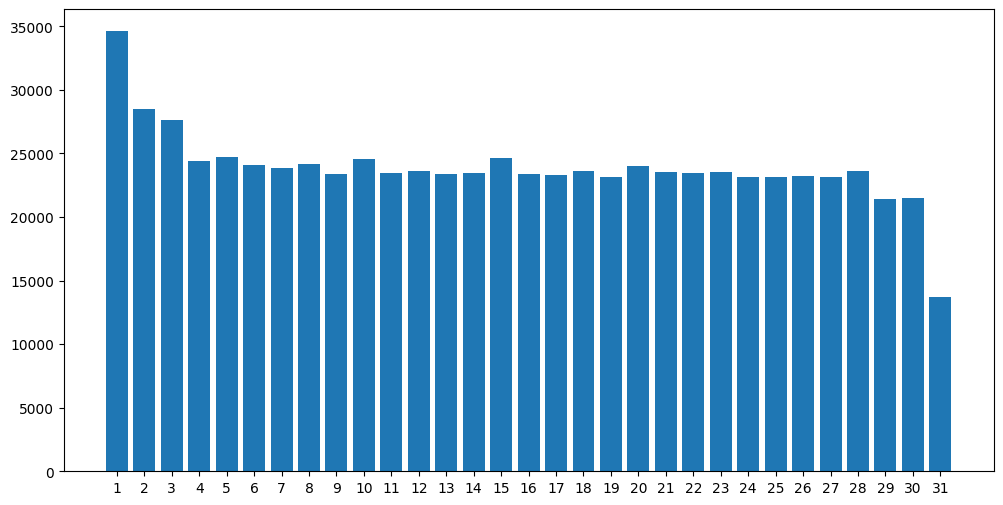

In [22]:
plt.figure(figsize = (12,6))
plt.bar(range(1,32), by_date)
plt.xticks(range(1,32), by_date.index);
plt.show()

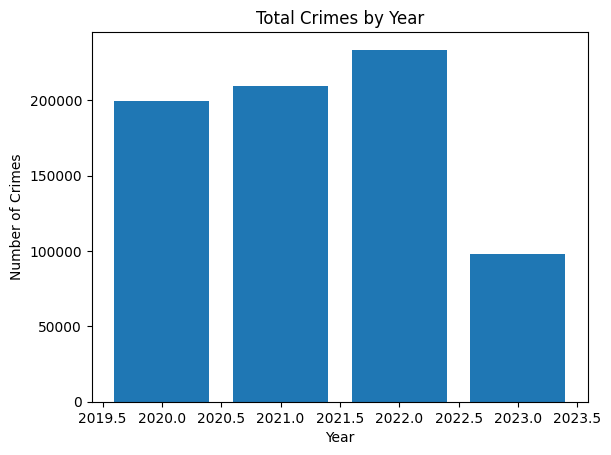

In [23]:

# Group the data by year and count the number of crimes in each year
yearly_counts = data.groupby('Year').size()
# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Total Crimes by Year')

# Create a bar chart using matplotlib
plt.bar(yearly_counts.index, yearly_counts.values)


# Display the chart
plt.show()

In [24]:
def makemil(time):
    ntime = ""
    if len(str(time)) == 1:
        ntime = "000" + str(time)
    if len(str(time)) == 2:
        ntime = "00" + str(time)
    if len(str(time)) == 3:
        ntime = "0" + str(time)
    if len(str(time)) == 4:
        ntime = str(time)
    return ntime

def returnhour(miltime):
    return miltime[:2]

In [25]:
# Formatting to 4 char string
data["TIME OCC"] = data["TIME OCC"].apply(makemil)

In [26]:
# Formatting to int so it can be sorted
data["Time Occurred Int"] = data["TIME OCC"].apply(int)

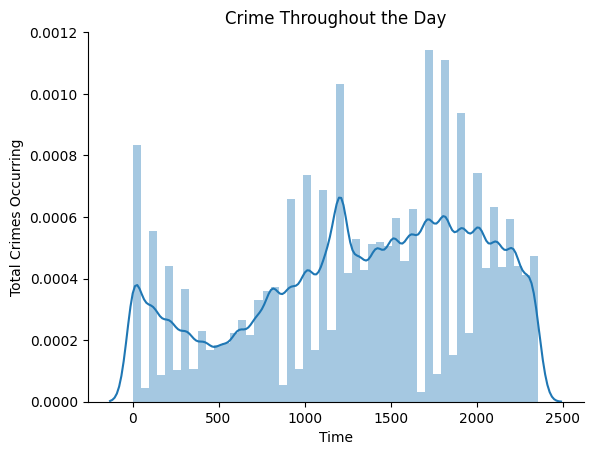

In [27]:
fig, ax = plt.subplots()
# Plot crime throughout a single day hours
sns.distplot(data["Time Occurred Int"])
# Axes
ax.set_title("Crime Throughout the Day")
ax.set_xlabel("Time")
ax.set_ylabel("Total Crimes Occurring")
sns.despine()

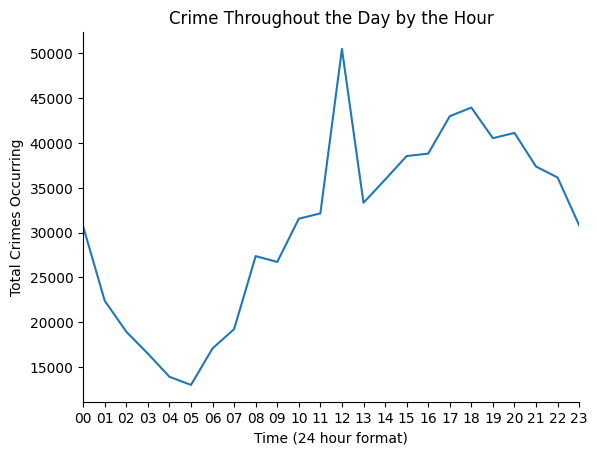

In [28]:
# Extracting the hour out from time
data["Hour Occurred"] = data["TIME OCC"].apply(returnhour)
fig, ax = plt.subplots()
# Crime through the hours
plt.plot(data["Hour Occurred"].value_counts().sort_index().index, data["Hour Occurred"].value_counts().sort_index())
# Axes
ax.set_title("Crime Throughout the Day by the Hour")
plt.xticks(range(24))
plt.xlim(0,23)
plt.xlabel("Time (24 hour format)")
plt.ylabel("Total Crimes Occurring")
sns.despine()

# 1. What Areas in LA have the Highest Crime Rate?

In [29]:
# Import WordCloud and STOPWORDS
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


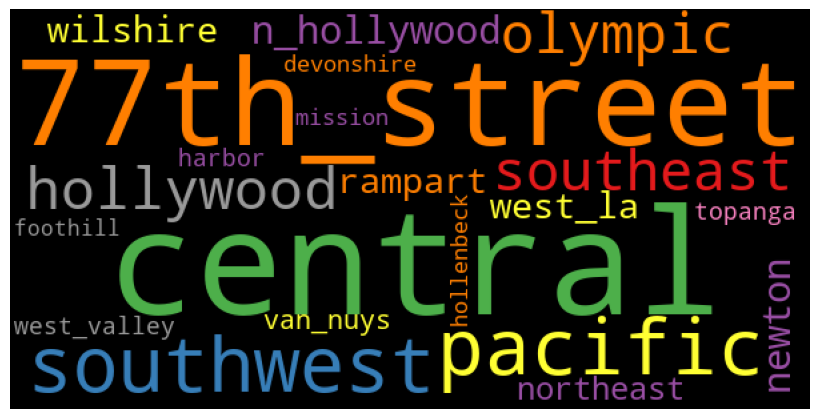

In [30]:

# Create new column with area names concatenated with underscore
data['Area_Name_Concat'] = data['AREA NAME'].str.replace(' ', '_')
crime_area=data['Area_Name_Concat']
stop_words = set(stopwords.words("english"))
punctuations = set(string.punctuation)
tokens = [word.lower() for desc in crime_area for word in word_tokenize(desc) 
          if word.lower() not in stop_words and word.lower() not in punctuations]

# Create a dictionary of word frequencies
word_freq = {}
for token in tokens:
    if token in word_freq:
        word_freq[token] += 1
    else:
        word_freq[token] = 1
        # Create a word cloud
wordcloud = WordCloud(width=600, height=300, background_color='Black', 
                      min_font_size=10, colormap='Set1').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


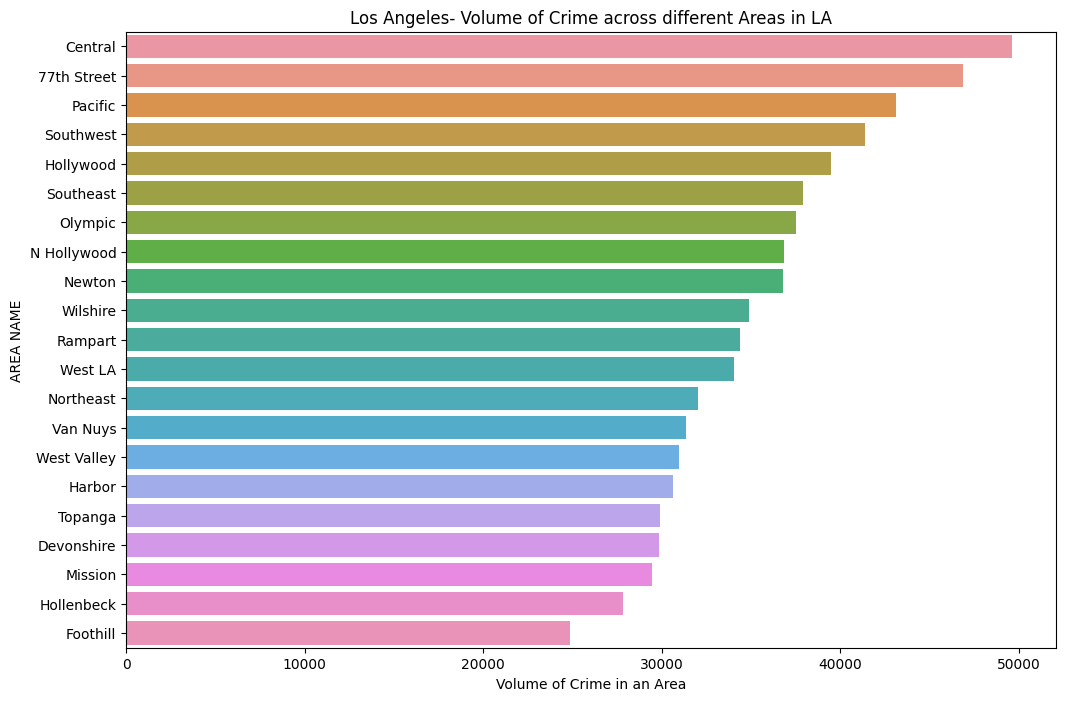

In [31]:
# Setting up figure
plt.figure(figsize=(12,8))

# Plotting categorial count plot for crime by area
sns.countplot(y='AREA NAME', data= data, orient="h", 
              order=data['AREA NAME'].value_counts().index)

# Setting x axis label and figure title
plt.xlabel('Volume of Crime in an Area')
plt.title('Los Angeles- Volume of Crime across different Areas in LA');

In [32]:
# Proportion of victims sorted in descenting order for the 
data['Vict Descent'].value_counts(normalize= True)[:10]

H    0.353270
W    0.236306
B    0.165331
X    0.108738
O    0.090828
A    0.025092
K    0.006103
F    0.004757
C    0.004309
J    0.001617
Name: Vict Descent, dtype: float64

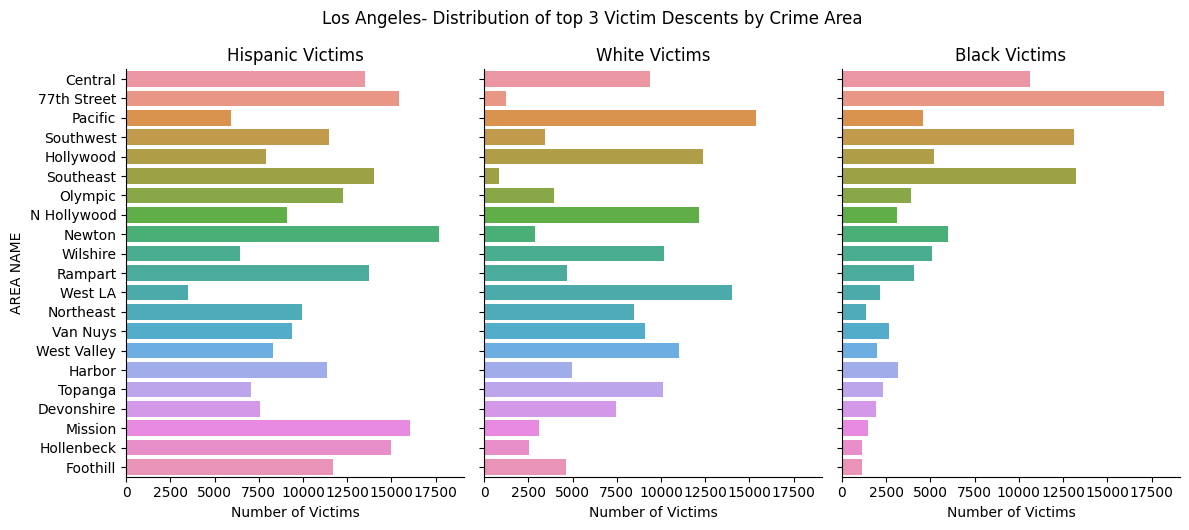

In [33]:
# Plotting a categorical estimate plot of Crime area by Descent
g = sns.catplot(y="AREA NAME", col="Vict Descent",
                col_order= data['Vict Descent'].value_counts()[:3].index
                ,data=data, kind="count",height=5, aspect=.8,
               order=data['AREA NAME'].value_counts().index)

# Setting label an title for first facet
g.axes[0,0].set_xlabel('Number of Victims')
g.axes[0,0].set_title('Hispanic Victims')

# Setting label an title for second facet
g.axes[0,1].set_xlabel('Number of Victims')
g.axes[0,1].set_title('White Victims')

# Setting label an title for third facet
g.axes[0,2].set_xlabel('Number of Victims')
g.axes[0,2].set_title('Black Victims')

#setting figure title for facetgrid plot
g.fig.suptitle('Los Angeles- Distribution of top 3 Victim Descents by Crime Area ', y = 1.05);

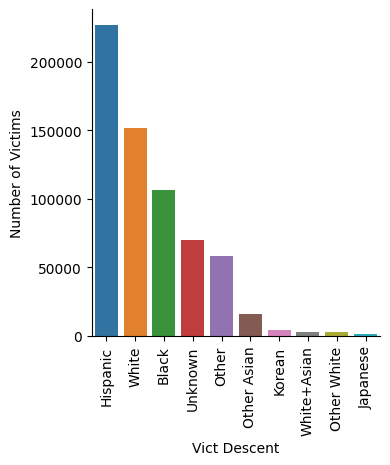

In [34]:
# Plotting  a countplot of Victim Descent
g = sns.catplot(x="Vict Descent", 
                data=data, 
                kind="count",
                height=4, orient="h",
                order=data['Vict Descent'].value_counts()[:10].index)

#setting x tick labels
g.set_xticklabels(['Hispanic','White','Black','Unknown', 'Other', 'Other Asian','Korean','White+Asian','Other White','Japanese'], rotation= 'vertical')

#setting y label
g.set_ylabels('Number of Victims')
g.set_titles('Distribution of victims by Descent');

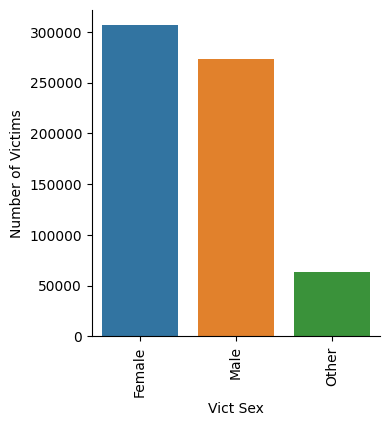

In [35]:
# Plotting  a countplot of Victim Descent
g = sns.catplot(x="Vict Sex", 
                data=data, 
                kind="count",
                height=4, orient="h",
                order=data['Vict Sex'].value_counts()[:3].index)

#setting x tick labels
g.set_xticklabels(['Female','Male','Other'], rotation= 'vertical')

#setting y label
g.set_ylabels('Number of Victims')
g.set_titles('Distribution of victims by Descent');

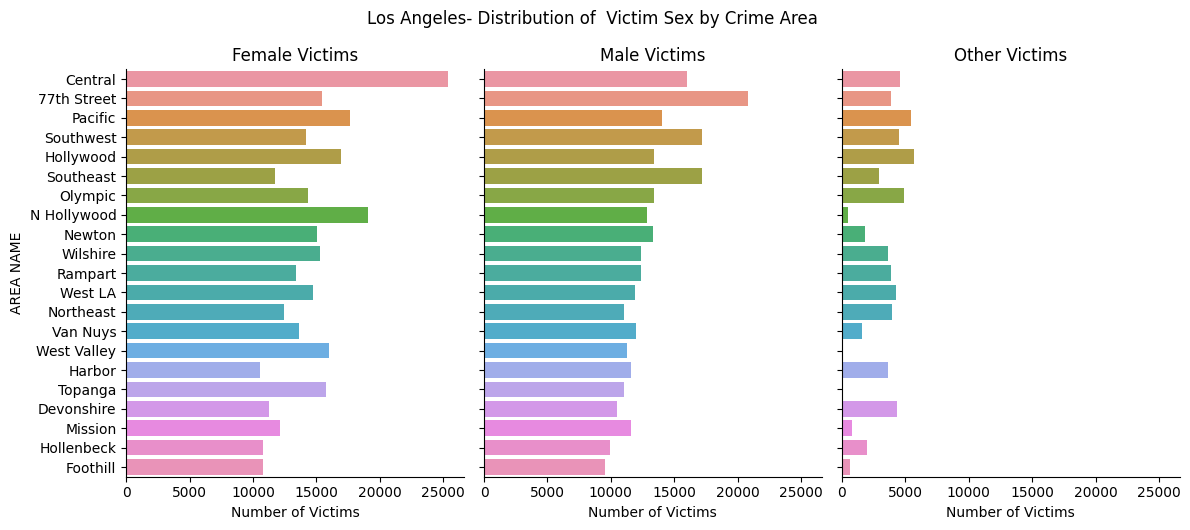

In [36]:
# Plotting a categorical estimate plot of Crime area by Descent
g = sns.catplot(y="AREA NAME", col="Vict Sex",
                col_order= data['Vict Sex'].value_counts()[:3].index
                ,data=data, kind="count",height=5, aspect=.8,
               order=data['AREA NAME'].value_counts().index)

# Setting label an title for first facet
g.axes[0,0].set_xlabel('Number of Victims')
g.axes[0,0].set_title('Female Victims')

# Setting label an title for second facet
g.axes[0,1].set_xlabel('Number of Victims')
g.axes[0,1].set_title('Male Victims')

# Setting label an title for third facet
g.axes[0,2].set_xlabel('Number of Victims')
g.axes[0,2].set_title('Other Victims')

#setting figure title for facetgrid plot
g.fig.suptitle('Los Angeles- Distribution of  Victim Sex by Crime Area ', y = 1.05);

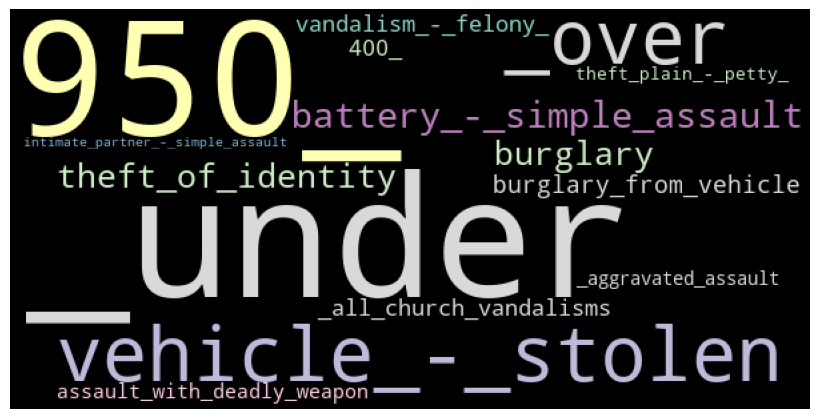

In [81]:
# Get the crime descriptions
data['Crm_Desc_Concat'] = data["Crm Cd Desc"].str.replace(' ', '_')
crime_desc=data['Crm_Desc_Concat'].dropna().astype(str)

# Remove punctuations and stopwords
stop_words = set(stopwords.words("english"))
punctuations = set(string.punctuation)
tokens = [word.lower() for desc in crime_desc for word in word_tokenize(desc) 
          if word.lower() not in stop_words and word.lower() not in punctuations]

# Create a dictionary of word frequencies
word_freq = {}
for token in tokens:
    if token in word_freq:
        word_freq[token] += 1
    else:
        word_freq[token] = 1

# Create a word cloud
wordcloud = WordCloud(width=600, height=300, background_color='Black', 
                      min_font_size=10, colormap='Set3').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# The below graph shows the count of most occuring crimes in LA

Text(0.5, 0, 'CRIMES')

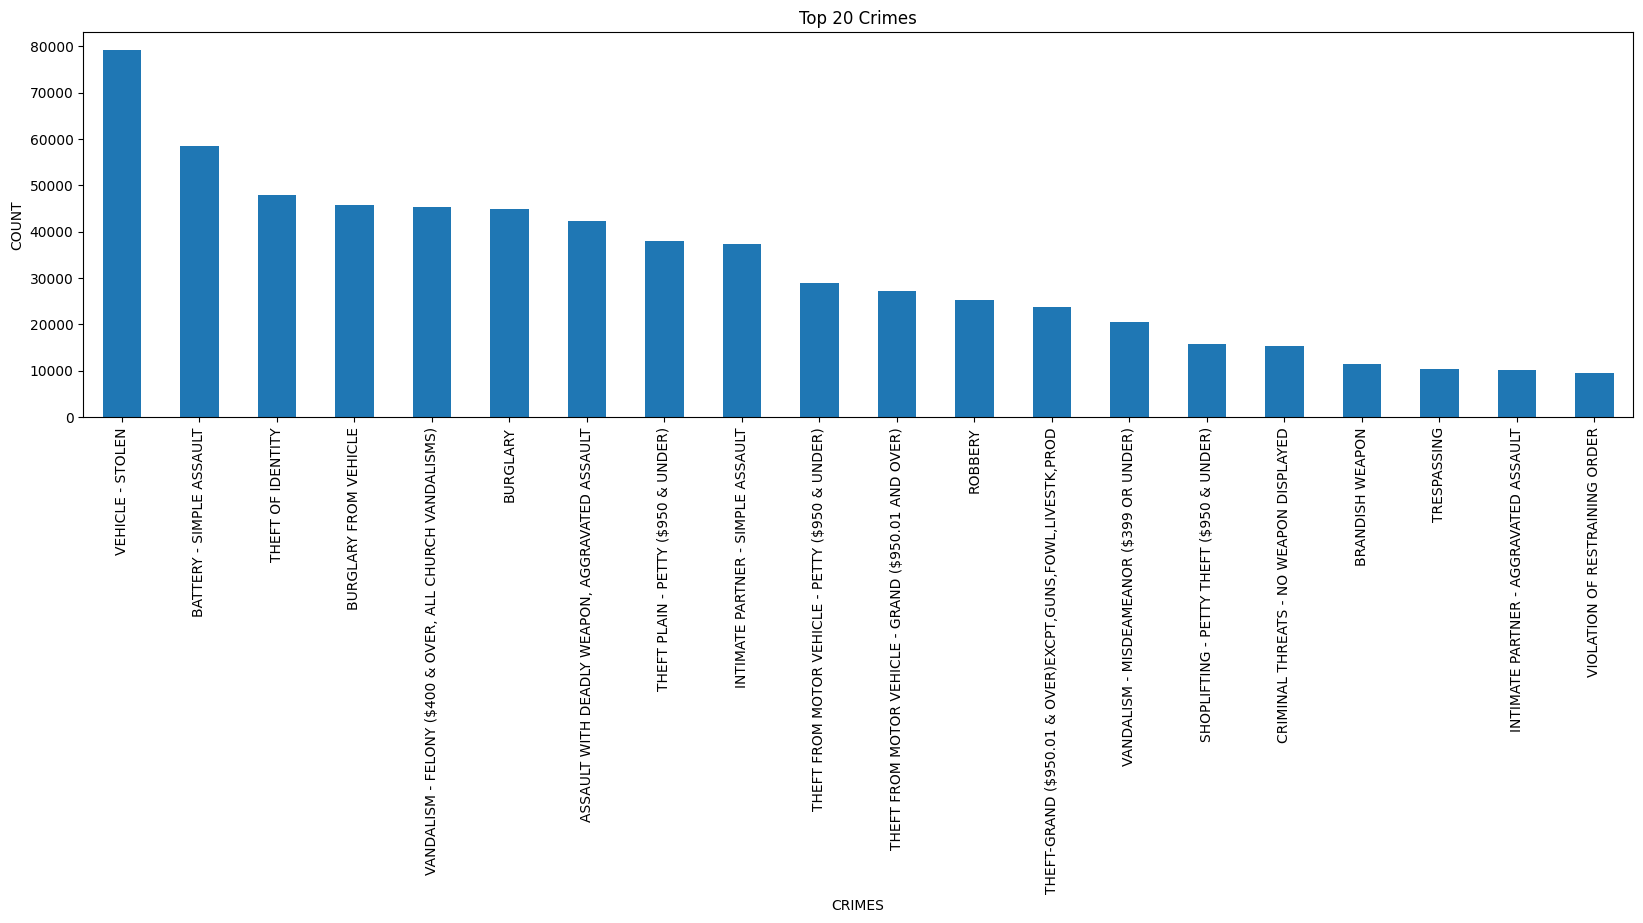

In [80]:
# top 20 crime types
x = data.groupby(['Crm Cd Desc']).size().reset_index(name='COUNTS')
x = x.sort_values(by=['COUNTS'], ascending=False)
ax = x.head(20).plot.bar(x='Crm Cd Desc', y='COUNTS', figsize=(20,5), rot=90, title = "Top 20 Crimes", legend = False, )
ax.set_ylabel("COUNT")
ax.set_xlabel("CRIMES")

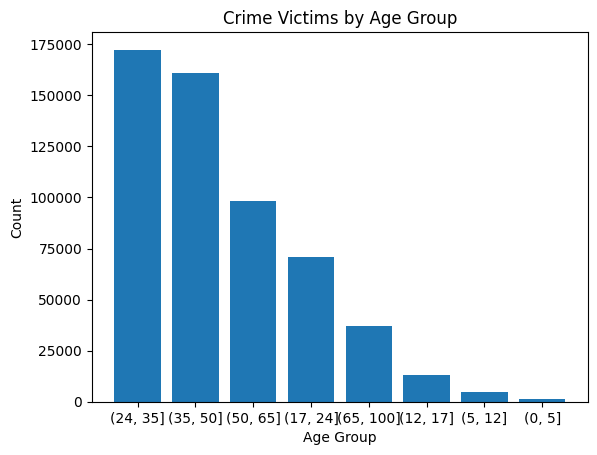

In [39]:
# Group victim ages into age ranges
age_ranges = pd.cut(data['Vict Age'], [0, 5, 12, 17, 24, 35, 50, 65, 100])

# Count the number of crimes in each age range
age_counts = age_ranges.value_counts()

# Create a bar plot of the age group counts
plt.bar(age_counts.index.astype(str), age_counts.values)

# Set the chart title and axis labels
plt.title('Crime Victims by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Show the chart
plt.show()
#es into pre-defined ranges, counts the number of crimes in each age range, and then creates a bar plot using matplotlib. The resulting chart will have the age ranges on the x-axis and the count of crimes on the y-axis. You can cus

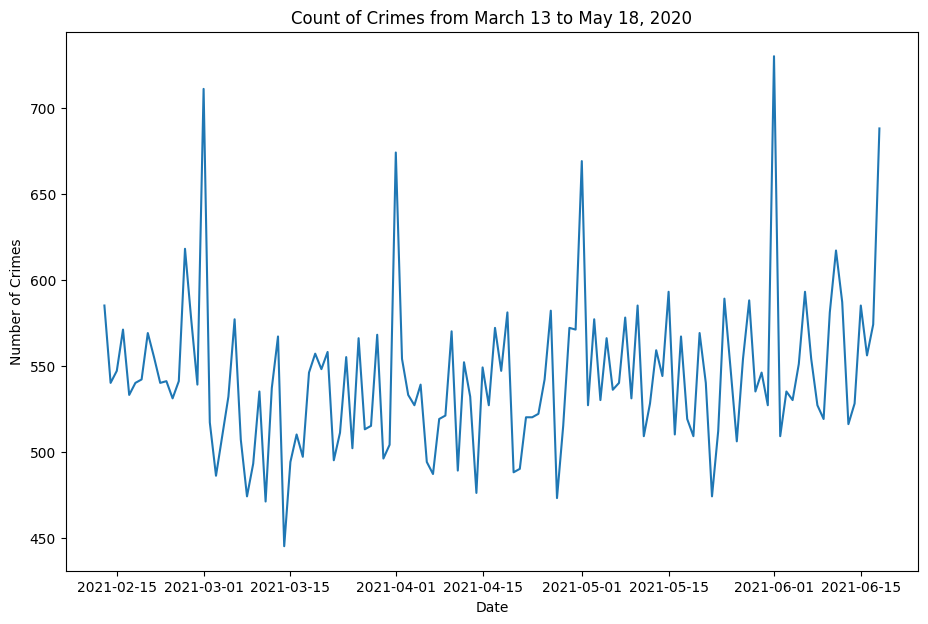

In [40]:
# Filter the data to include only the dates between March 13 and May 18, 2020
start_date = pd.Timestamp(2021, 2, 13)
end_date = pd.Timestamp(2021, 6, 18)
filtered_data = data[(data['DATE OCC'] >= start_date) & (data['DATE OCC'] <= end_date)]

# Group the filtered data by date and count the number of crimes for each date
crime_counts = filtered_data.groupby('DATE OCC').size()

# Plot a line chart of the crime counts
plt.figure(figsize=(11, 7))
plt.plot(crime_counts.index, crime_counts.values)
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.title('Count of Crimes from March 13 to May 18, 2020')
plt.show()

# Status Description

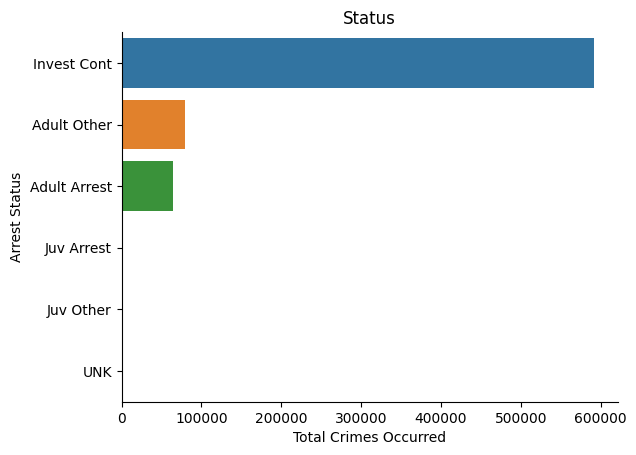

In [41]:
fig, ax = plt.subplots()
# Plotting the arrest status
sns.barplot(y=data["Status Desc"].value_counts().index,
                 x=data["Status Desc"].value_counts(), ax=ax)
# Axes
ax.set_title("Status")
ax.set_xlabel("Total Crimes Occurred")
ax.set_ylabel("Arrest Status")
sns.despine()

In [42]:
# Removing Entries for X and H and - (by elimination)
data["Vict Sex"] = data["Vict Sex"][data["Vict Sex"] != "H"]
data["Vict Sex"] = data["Vict Sex"][data["Vict Sex"] != "-"]
# Combining two columns into a dataframe
cc_vg = data[["Crm Cd Desc", "Vict Sex"]]
# Dropping null values
cc_vg = cc_vg[pd.notnull(cc_vg["Vict Sex"])]
# Saving top 15 crimes
crimetop15 = cc_vg["Crm Cd Desc"].value_counts().head(15).index
# Choosing data that is included in the top 10 crimes (by selection)
crimecc = cc_vg.loc[cc_vg["Crm Cd Desc"].isin(crimetop15)]
# Group by Crime Code Description and Victim Gender
cc_gender = crimecc.groupby(["Crm Cd Desc", "Vict Sex"]).size().reset_index(name="Count")
cc_gender

,Crm Cd Desc,Vict Sex,Count
0,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",F,11326
1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",M,30253
2,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",X,776
3,BATTERY - SIMPLE ASSAULT,F,27522
4,BATTERY - SIMPLE ASSAULT,M,30666
5,BATTERY - SIMPLE ASSAULT,X,347
6,BURGLARY,F,12269
7,BURGLARY,M,22332
8,BURGLARY,X,10238
9,BURGLARY FROM VEHICLE,F,19065


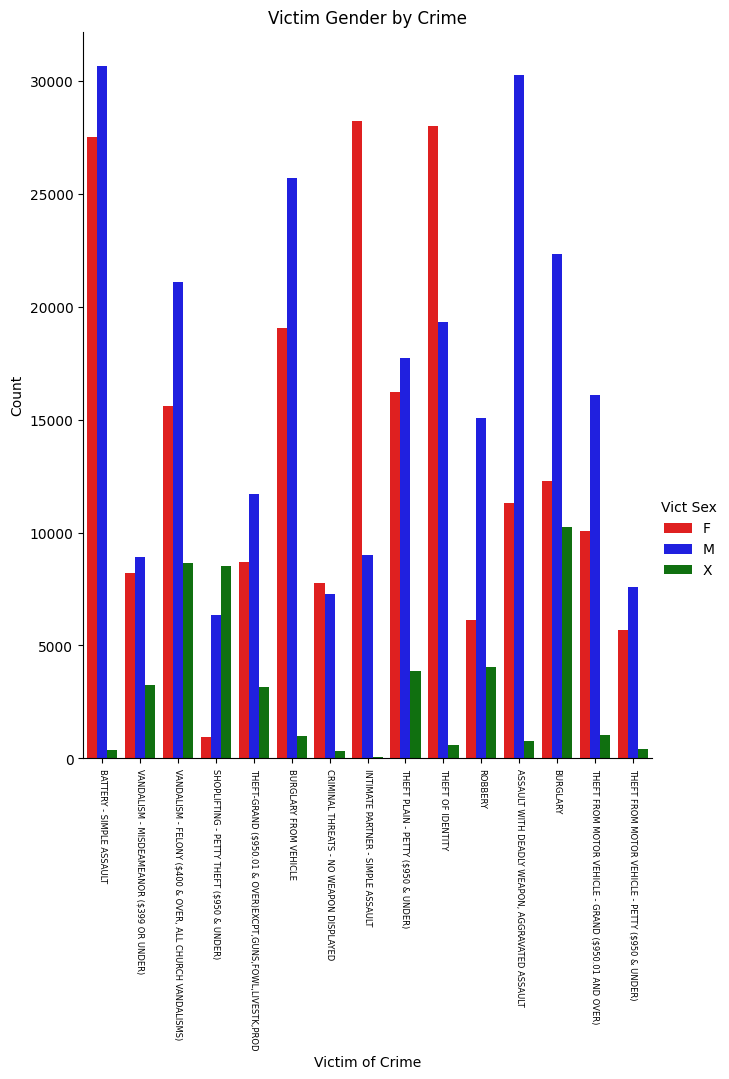

<Figure size 1200x800 with 0 Axes>

In [43]:
# Factorplot Crime and Gender based on count
ax = sns.catplot(x="Crm Cd Desc", hue="Vict Sex", kind="count", data=crimecc,height=8,aspect=.9,
                    palette=["red", "blue","green","black"])
# Axes
plt.title("Victim Gender by Crime")
plt.figure(figsize=(12,8))
ax.set_xticklabels(rotation=-90,fontsize=6)
ax.set_xlabels("Victim of Crime")
ax.set_ylabels("Count")
sns.despine()

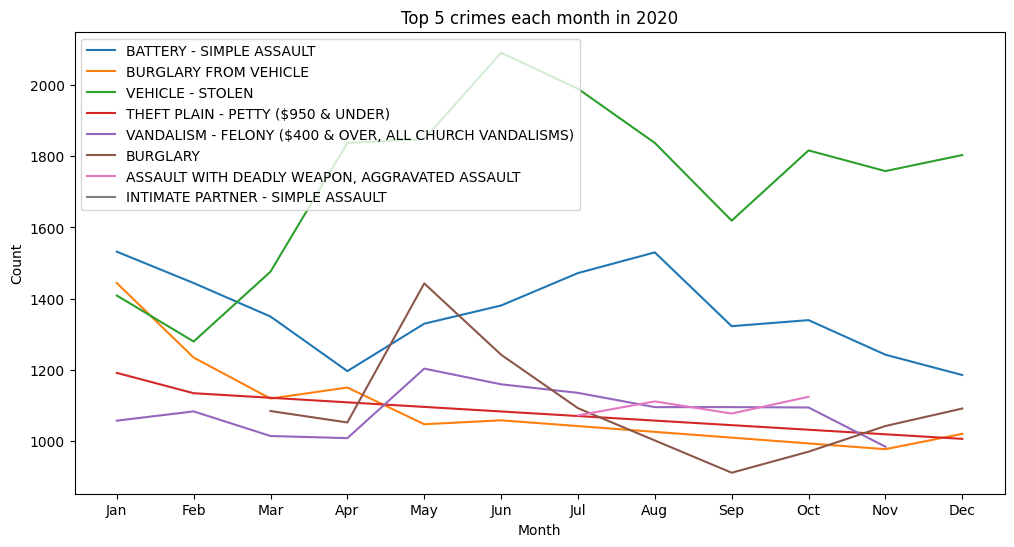

In [44]:
# Filter the data to include only the year 2020
data_2020 = data[data['Year'] == 2020]

# Group by month and crime description, and count the number of occurrences
top_crimes = data_2020.groupby(['Month', 'Crm Cd Desc']).size().reset_index(name='Count')

# Get top 5 crimes for each month
top_crimes = top_crimes.groupby('Month').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)

# Sort by month number
top_crimes = top_crimes.sort_values(by='Month')

# Plot the graph
plt.figure(figsize=(12, 6))
for i, crime in enumerate(top_crimes['Crm Cd Desc'].unique()):
    plt.plot('Month', 'Count', data=top_crimes[top_crimes['Crm Cd Desc']==crime], label=crime)
plt.legend()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Top 5 crimes each month in 2020')
plt.show()

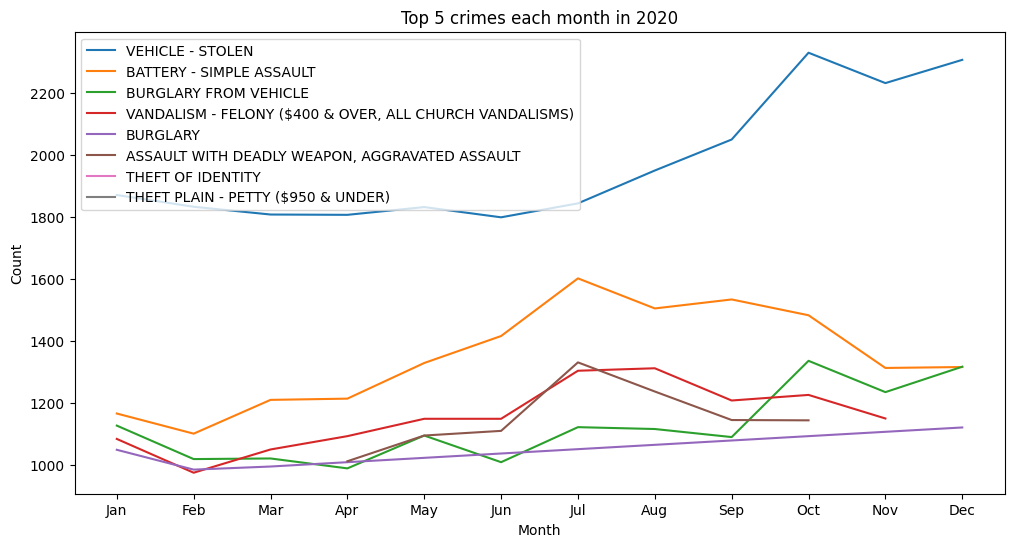

In [45]:
# Filter the data to include only the year 2020
data_2020 = data[data['Year'] == 2021]

# Group by month and crime description, and count the number of occurrences
top_crimes = data_2020.groupby(['Month', 'Crm Cd Desc']).size().reset_index(name='Count')

# Get top 5 crimes for each month
top_crimes = top_crimes.groupby('Month').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)

# Sort by month number
top_crimes = top_crimes.sort_values(by='Month')

# Plot the graph
plt.figure(figsize=(12, 6))
for i, crime in enumerate(top_crimes['Crm Cd Desc'].unique()):
    plt.plot('Month', 'Count', data=top_crimes[top_crimes['Crm Cd Desc']==crime], label=crime)
plt.legend()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Top 5 crimes each month in 2020')
plt.show()

In [46]:
# Previewing the total tally
data["Premis Desc"].value_counts()

STREET                                          186003
SINGLE FAMILY DWELLING                          125654
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     90911
PARKING LOT                                      52548
OTHER BUSINESS                                   34495
                                                 ...  
MTA - SILVER LINE - DOWNTOWN STREET STOPS            2
MTA - GOLD LINE - LITTLE TOKYO/ARTS DISTRICT         1
TRAM/STREETCAR(BOXLIKE WAG ON RAILS)*                1
DEPT OF DEFENSE FACILITY                             1
HARBOR FRWY STATION (NOT LINE SPECIFIC)              1
Name: Premis Desc, Length: 306, dtype: int64

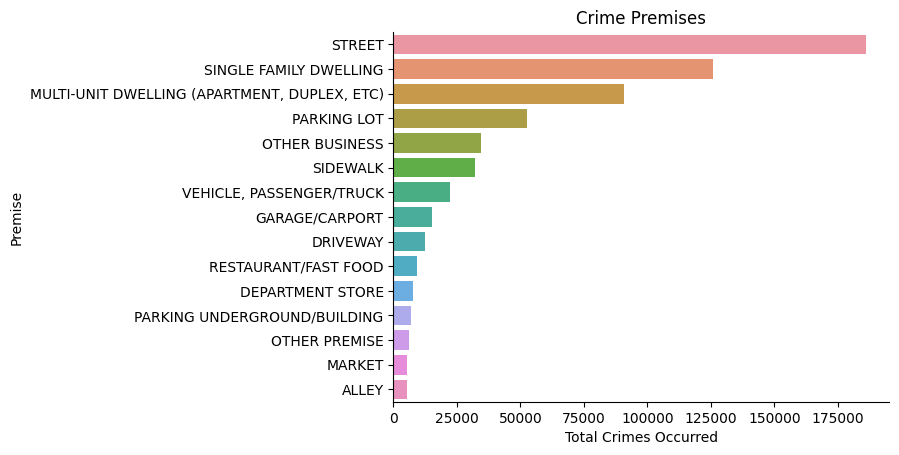

In [47]:
# We will only be looking at the top 15 premises
fig, ax = plt.subplots()
# Plotting top 15 premises
sns.barplot(y=data["Premis Desc"].value_counts().head(15).index,
                 x=data["Premis Desc"].value_counts().head(15), ax=ax)
# Axes
ax.set_title("Crime Premises")
ax.set_xlabel("Total Crimes Occurred")
ax.set_ylabel("Premise")
sns.despine()

In [48]:
data["Weapon Desc"].value_counts().head(10)

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    138020
UNKNOWN WEAPON/OTHER WEAPON                        26528
VERBAL THREAT                                      18963
HAND GUN                                           15882
SEMI-AUTOMATIC PISTOL                               5858
KNIFE WITH BLADE 6INCHES OR LESS                    5366
UNKNOWN FIREARM                                     5243
OTHER KNIFE                                         4654
MACE/PEPPER SPRAY                                   2854
VEHICLE                                             2595
Name: Weapon Desc, dtype: int64

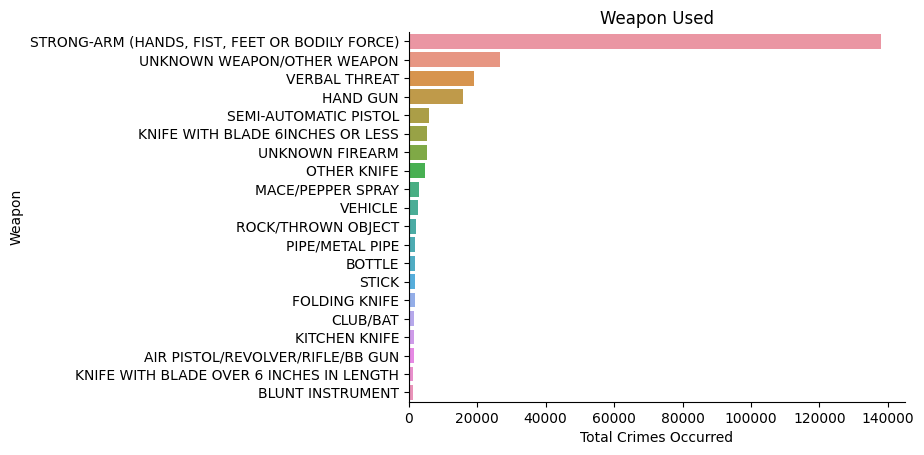

In [49]:
fig, ax = plt.subplots()
# Plotting weapons used
sns.barplot(y=data["Weapon Desc"].value_counts().head(20).index,
                 x=data["Weapon Desc"].value_counts().head(20), ax=ax)
# Axes
ax.set_title("Weapon Used")
ax.set_xlabel("Total Crimes Occurred")
ax.set_ylabel("Weapon")
sns.despine()

In [50]:
# Filtering only rows with Hand guns or Semi-automatic pistols (by equal to)
data["Guns Only"] = data["Weapon Desc"][(data["Weapon Desc"] == "HAND GUN") | 
                                                 (data["Weapon Desc"] == "SEMI-AUTOMATIC PISTOL")]
# Group by Guns Only and Hour Occurred
cc_gun = data.groupby(["Hour Occurred", "Guns Only"]).size().reset_index(name="Count")
cc_gun.tail(6)


,Hour Occurred,Guns Only,Count
42,21,HAND GUN,1102
43,21,SEMI-AUTOMATIC PISTOL,444
44,22,HAND GUN,1082
45,22,SEMI-AUTOMATIC PISTOL,404
46,23,HAND GUN,1054
47,23,SEMI-AUTOMATIC PISTOL,331


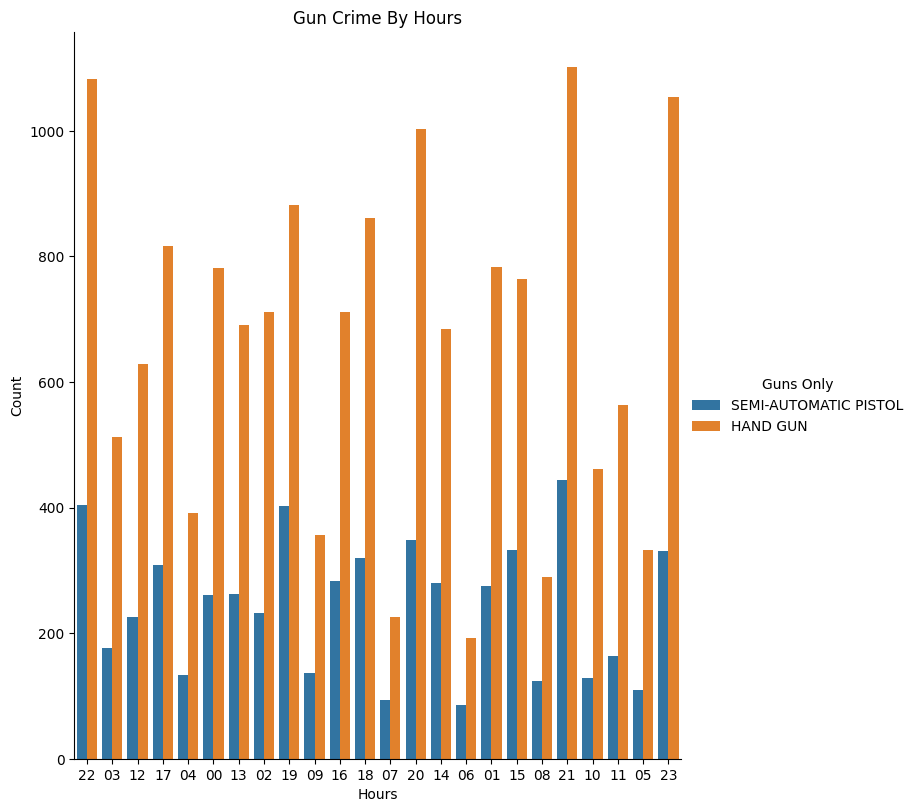

In [51]:
# Catplot Crimes by Weapon used
 
ax = sns.catplot(x="Hour Occurred", hue="Guns Only", kind="count", data=data, height=8,aspect=.9)
# Axes
plt.title("Gun Crime By Hours")
ax.set_xlabels("Hours")
ax.set_ylabels("Count")
sns.despine()

In [52]:
data["Premis Desc"].value_counts().head(5)



STREET                                          186003
SINGLE FAMILY DWELLING                          125654
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     90911
PARKING LOT                                      52548
OTHER BUSINESS                                   34495
Name: Premis Desc, dtype: int64

In [53]:
# Filtering crimes that happen by top 5 by (by equal to)
data["Public Premise"] = data["Premis Desc"][(data["Premis Desc"] == "STREET") |
                                                       (data["Premis Desc"] == "SINGLE FAMILY DWELLING") | 
                                                       (data["Premis Desc"] == "MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)") |
                                                       (data["Premis Desc"] == "PARKING LOT") |
                                                       (data["Premis Desc"] == "SIDEWALK")]


In [54]:
# loading crime data csv file
df = pd.read_csv("C:/Users/skris/Downloads/Crime_Data_from_2010_to_2019.csv")
# preview of crime data
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [55]:
# checking for null values
df.isna().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            228261
Vict Age                0
Vict Sex           196766
Vict Descent       196812
Premis Cd              53
Premis Desc           187
Weapon Used Cd    1407432
Weapon Desc       1407433
Status                  3
Status Desc             0
Crm Cd 1               10
Crm Cd 2          1979263
Crm Cd 3          2116256
Crm Cd 4          2119692
LOCATION                0
Cross Street      1764202
LAT                     0
LON                     0
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119797 entries, 0 to 2119796
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            int64  
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
dtypes: float64(8

In [57]:
df['Vict Descent'].value_counts()

H    727540
W    511348
B    335924
O    203393
X     78280
A     51218
K      9203
F      2582
C      1074
I       951
J       419
P       351
V       212
U       192
Z       136
G        85
S        32
D        24
L        18
-         3
Name: Vict Descent, dtype: int64

In [58]:
descent_dict ={'A': 'Other Asian', 'B': 'Black', 'C': 'Chinese',
               'D': 'Cambodian', 'F': 'Filipino', 'G': 'Guamanian',
               'H': 'Hispanic', 'I': 'Native', 'J': 'Japanese', 
               'K': 'Korean', 'L': 'Laotian', 'O': 'Other',
               'P': 'Pacific Islander', 'S': 'Samoan', 'U': 'Hawaiian',
               'V': 'Vietnamese', 'W': 'White',  'X': 'Unknown', 'Z':'Asian Indian'}
df['Vict Descent'].fillna('X', inplace= True)

In [59]:
df['Vict Descent'].replace(to_replace=['-'], value='X', inplace = True)

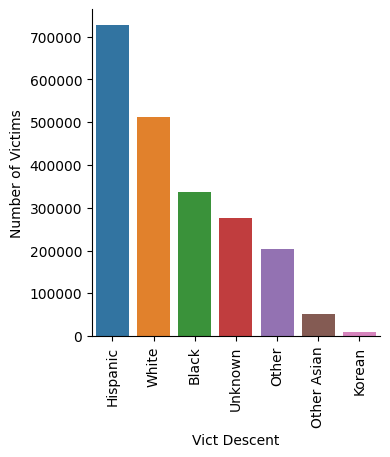

In [60]:
# Plotting  a countplot of Victim Descent
g = sns.catplot(x="Vict Descent", 
                data=df, 
                kind="count",
                height=4, orient="h",
                order=df['Vict Descent'].value_counts()[:7].index)

#setting x tick labels
g.set_xticklabels(['Hispanic','White','Black','Unknown', 'Other', 'Other Asian','Korean'], rotation= 'vertical')

#setting y label
g.set_ylabels('Number of Victims')
g.set_titles('Distribution of victims by Descent');

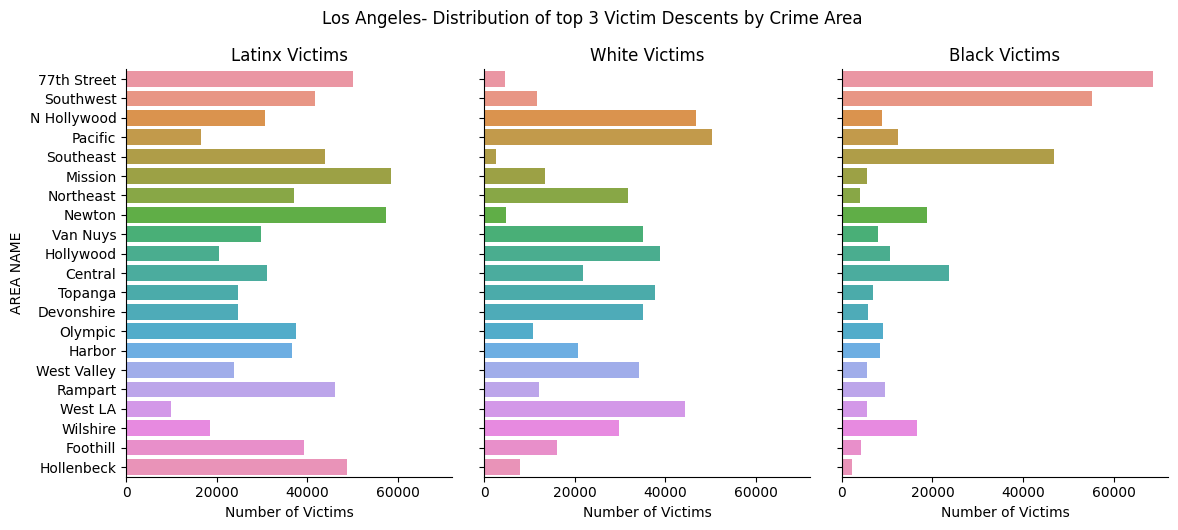

In [61]:
# Plotting a categorical estimate plot of Crime area by Descent
g = sns.catplot(y="AREA NAME", col="Vict Descent",
                col_order= df['Vict Descent'].value_counts()[:3].index
                ,data=df, kind="count",height=5, aspect=.8,
               order=df['AREA NAME'].value_counts().index)

# Setting label an title for first facet
g.axes[0,0].set_xlabel('Number of Victims')
g.axes[0,0].set_title('Latinx Victims')

# Setting label an title for second facet
g.axes[0,1].set_xlabel('Number of Victims')
g.axes[0,1].set_title('White Victims')

# Setting label an title for third facet
g.axes[0,2].set_xlabel('Number of Victims')
g.axes[0,2].set_title('Black Victims')

#setting figure title for facetgrid plot
g.fig.suptitle('Los Angeles- Distribution of top 3 Victim Descents by Crime Area ', y = 1.05);

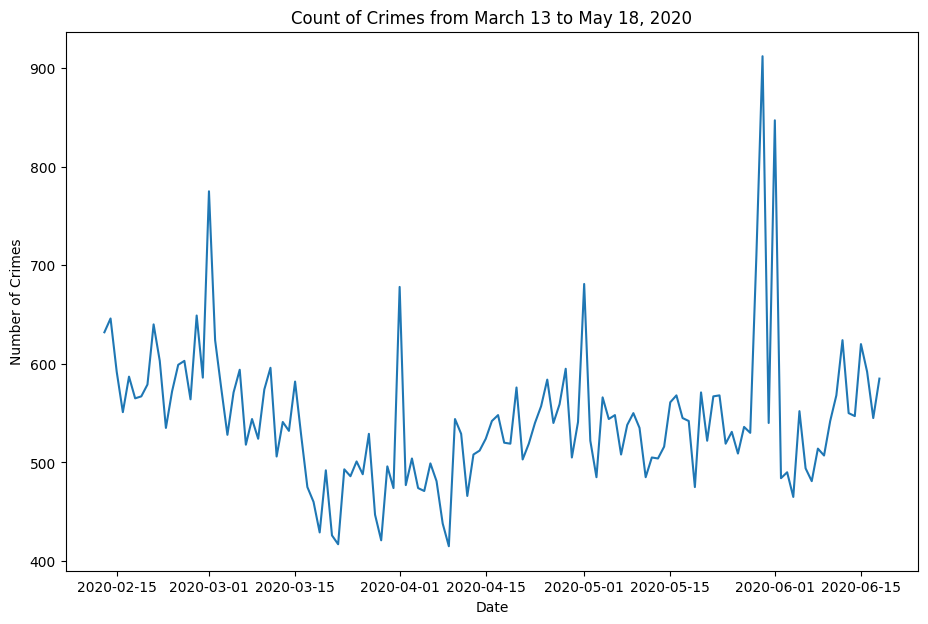

In [62]:
# Filter the data to include only the dates between March 13 and May 18, 2020
start_date = pd.Timestamp(2020, 2, 13)
end_date = pd.Timestamp(2020, 6, 18)
filtered_data = data[(data['DATE OCC'] >= start_date) & (data['DATE OCC'] <= end_date)]

# Group the filtered data by date and count the number of crimes for each date
crime_counts = filtered_data.groupby('DATE OCC').size()

# Plot a line chart of the crime counts
plt.figure(figsize=(11, 7))
plt.plot(crime_counts.index, crime_counts.values)
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.title('Count of Crimes from March 13 to May 18, 2020')
plt.show()

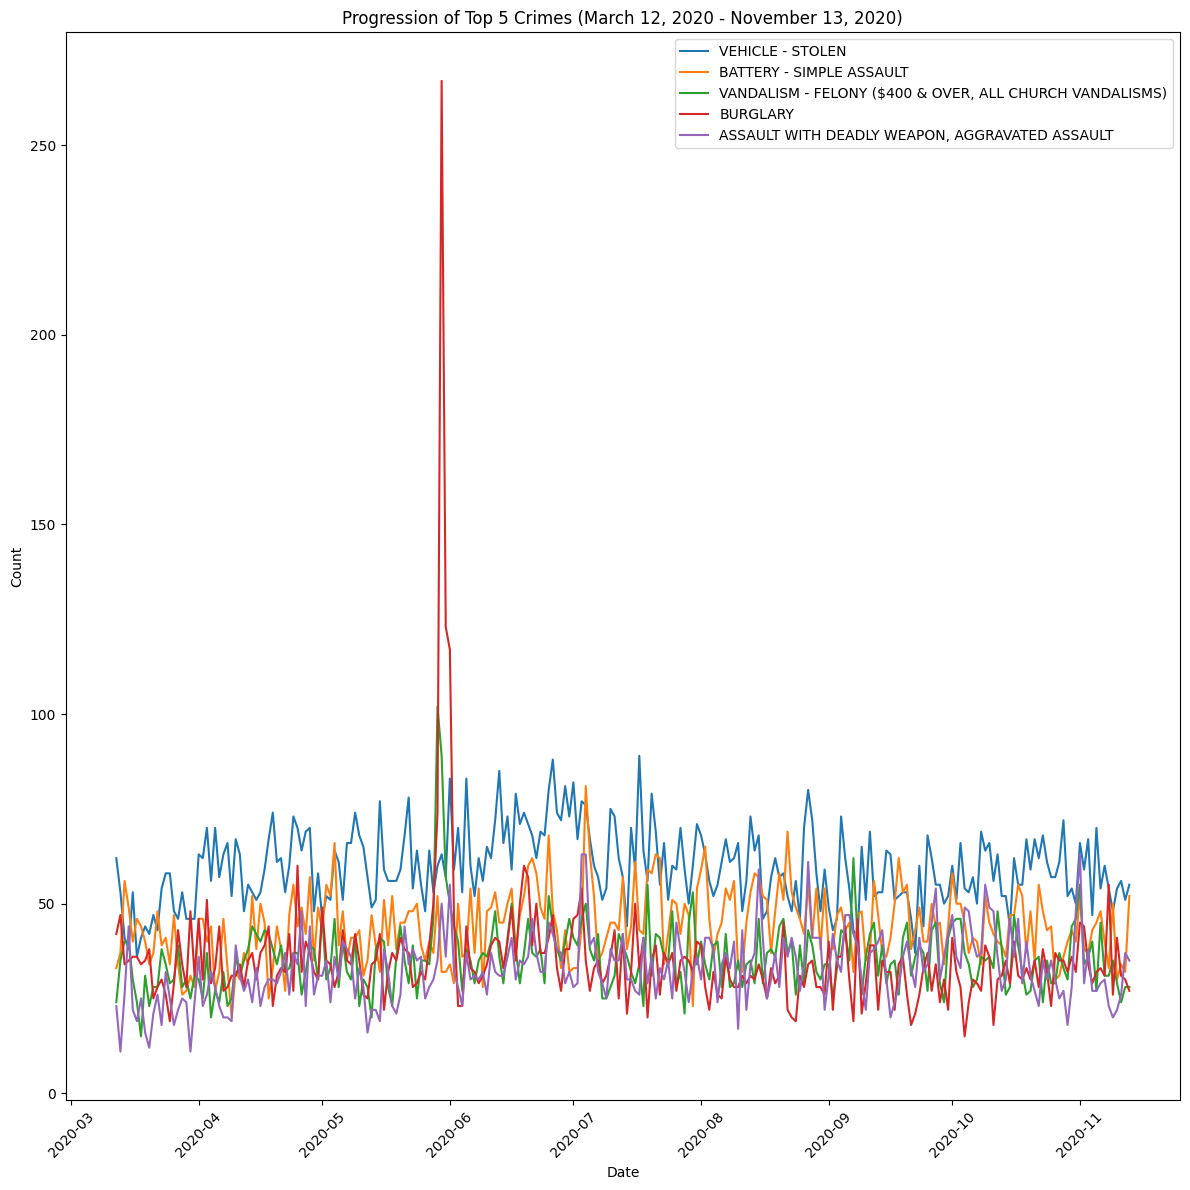

In [63]:
start_date = pd.to_datetime('2020-03-12')
end_date = pd.to_datetime('2020-11-13')
filtered_data = data[(data['DATE OCC'] >= start_date) & (data['DATE OCC'] <= end_date)]

# Group by crime description and count the number of occurrences
top_crimes = filtered_data['Crm Cd Desc'].value_counts().nlargest(5)

# Create a new dataframe for storing the progression data
progression_data = pd.DataFrame(columns=top_crimes.index)

# Iterate over each day in the date range
for day in pd.date_range(start=start_date, end=end_date, freq='D'):
    # Filter the dataframe for the current day
    day_data = filtered_data[filtered_data['DATE OCC'] == day]
    
    # Count the occurrences of each top crime for the current day
    crime_counts = day_data['Crm Cd Desc'].value_counts()
    
    # Fill the progression dataframe with the crime counts for the current day
    progression_data.loc[day] = crime_counts[top_crimes.index].tolist()

# Plot the progression of the top 5 crimes
plt.figure(figsize=(12, 12))
for crime in progression_data.columns:
    plt.plot(progression_data.index, progression_data[crime], label=crime)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Progression of Top 5 Crimes (March 12, 2020 - November 13, 2020)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

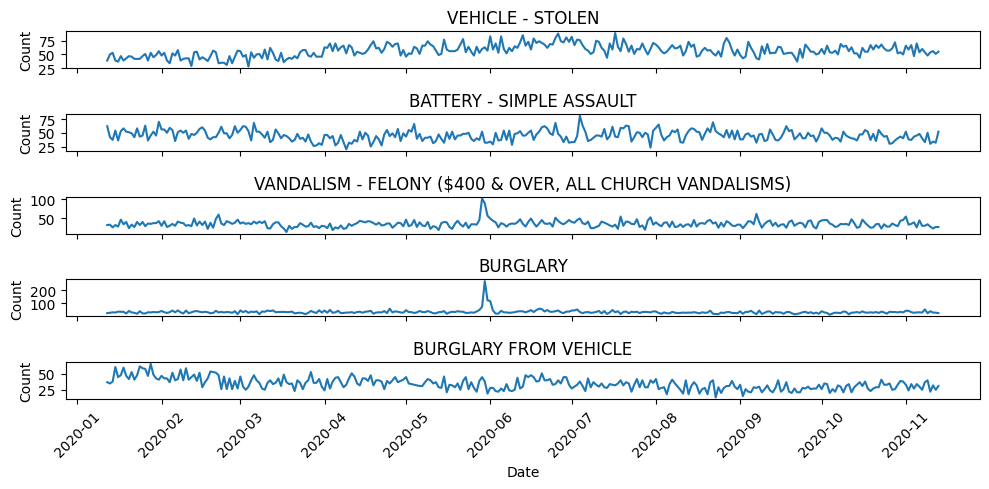

In [105]:
start_date = pd.to_datetime('2020-01-12')
end_date = pd.to_datetime('2020-11-13')
filtered_data = data[(data['DATE OCC'] >= start_date) & (data['DATE OCC'] <= end_date)]

# Group by crime description and count the number of occurrences
top_crimes = filtered_data['Crm Cd Desc'].value_counts().nlargest(5)
# Create subplots for each crime
fig, axs = plt.subplots(len(top_crimes), 1, figsize=(10, 5), sharex=True)

# Iterate over each top crime
for i, crime in enumerate(top_crimes.index):
    # Filter the dataframe for the current crime
    crime_data = filtered_data[filtered_data['Crm Cd Desc'] == crime]
    
    # Count the occurrences of the crime for each day
    crime_counts = crime_data['DATE OCC'].value_counts().sort_index()
    
    # Plot the progression of the crime
    axs[i].plot(crime_counts.index, crime_counts.values)
    axs[i].set_ylabel('Count')
    axs[i].set_title(crime)
    # Set the x-axis label and rotate the tick labels

plt.xlabel('Date')
plt.xticks(rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()

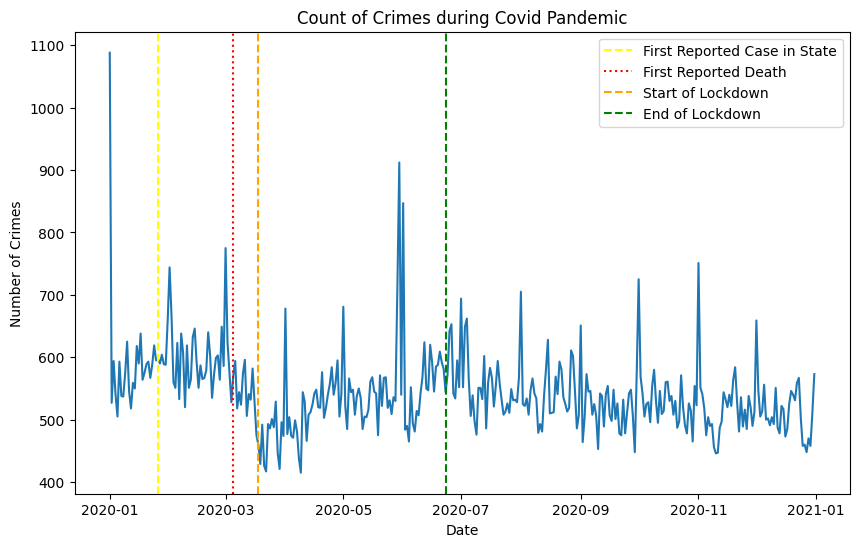

In [96]:
# Filter the data to include only the dates between Feb 13 and October 18, 2020
start_date = pd.Timestamp(2020, 1, 1)
end_date = pd.Timestamp(2020, 12, 31)
filtered_data = data[(data['DATE OCC'] >= start_date) & (data['DATE OCC'] <= end_date)]

# Group the filtered data by date and count the number of crimes for each date
crime_counts = filtered_data.groupby('DATE OCC').size()

# Plot a line chart of the crime counts
plt.figure(figsize=(10, 6))
plt.plot(crime_counts.index, crime_counts.values)
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.title('Count of Crimes during Covid Pandemic')

# Highlight the points corresponding to the start and end of the lockdown
First_case = pd.Timestamp(2020, 1, 26)
First_death = pd.Timestamp(2020, 3, 5)
lockdown_start = pd.Timestamp(2020, 3, 18)
lockdown_end = pd.Timestamp(2020, 6, 23)

plt.axvline(x=First_case, color='yellow', linestyle='--', label='First Reported Case in State')
plt.axvline(x=First_death, color='red', linestyle=':', label='First Reported Death')
plt.axvline(x=lockdown_start, color='orange', linestyle='--', label='Start of Lockdown')
plt.axvline(x=lockdown_end, color='green', linestyle='--', label='End of Lockdown')

# Add a legend
plt.legend()

plt.show()


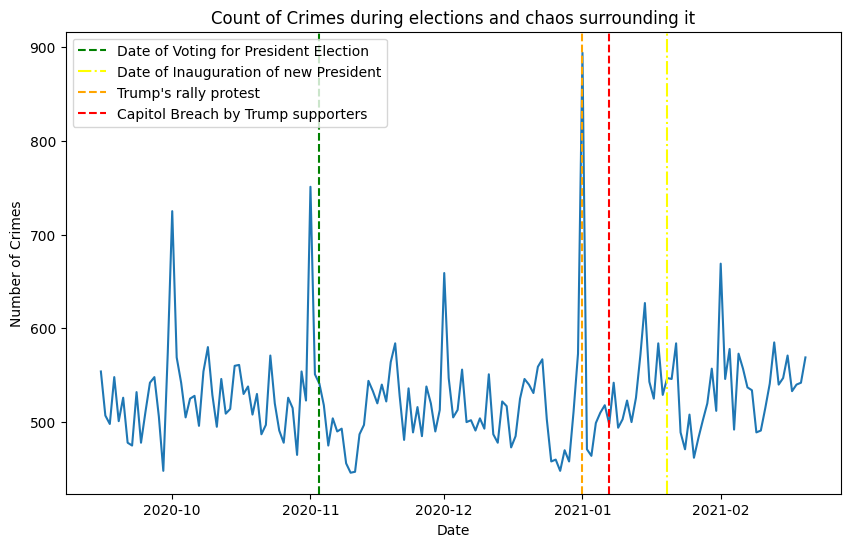

In [109]:
# Filter the data to include only the dates between Feb 13 and October 18, 2020
start_date = pd.Timestamp(2020, 9, 15)
end_date = pd.Timestamp(2021, 2, 20)
filtered_data = data[(data['DATE OCC'] >= start_date) & (data['DATE OCC'] <= end_date)]

# Group the filtered data by date and count the number of crimes for each date
crime_counts = filtered_data.groupby('DATE OCC').size()

# Plot a line chart of the crime counts
plt.figure(figsize=(10, 6))
plt.plot(crime_counts.index, crime_counts.values)
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.title('Count of Crimes during elections and chaos surrounding it')

# Highlight the points corresponding to the start and end of the lockdown
election_date = pd.Timestamp(2020, 11, 3)
president_sworn = pd.Timestamp(2021, 1, 20)
Trump_protest= pd.Timestamp(2021,1,1)
Capitol_breach=pd.Timestamp(2021,1,7)

plt.axvline(x=election_date, color='green', linestyle='--', label='Date of Voting for President Election')
plt.axvline(x=president_sworn, color='yellow', linestyle='-.', label='Date of Inauguration of new President')
plt.axvline(x=Trump_protest, color='orange', linestyle='--', label="Trump's rally protest")
plt.axvline(x=Capitol_breach, color='red', linestyle='--', label="Capitol Breach by Trump supporters")
# Add a legend
plt.legend()

plt.show()


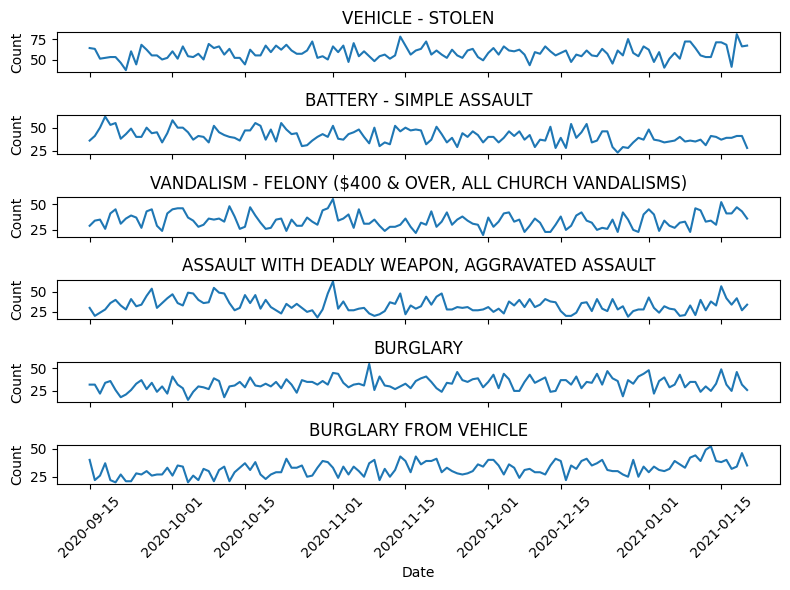

In [112]:
start_date = pd.to_datetime('2020-9-15')
end_date = pd.to_datetime('2021-01-20')
filtered_data = data[(data['DATE OCC'] >= start_date) & (data['DATE OCC'] <= end_date)]

# Group by crime description and count the number of occurrences
top_crimes = filtered_data['Crm Cd Desc'].value_counts().nlargest(6)

# Create subplots for each crime
fig, axs = plt.subplots(len(top_crimes), 1, figsize=(8, 6), sharex=True)

# Iterate over each top crime
for i, crime in enumerate(top_crimes.index):
    # Filter the dataframe for the current crime
    crime_data = filtered_data[filtered_data['Crm Cd Desc'] == crime]
    
    # Count the occurrences of the crime for each day
    crime_counts = crime_data['DATE OCC'].value_counts().sort_index()
    
    # Plot the progression of the crime
    axs[i].plot(crime_counts.index, crime_counts.values)
    axs[i].set_ylabel('Count')
    axs[i].set_title(crime)
    # Set the x-axis label and rotate the tick labels
plt.xlabel('Date')
plt.xticks(rotation=45)



# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


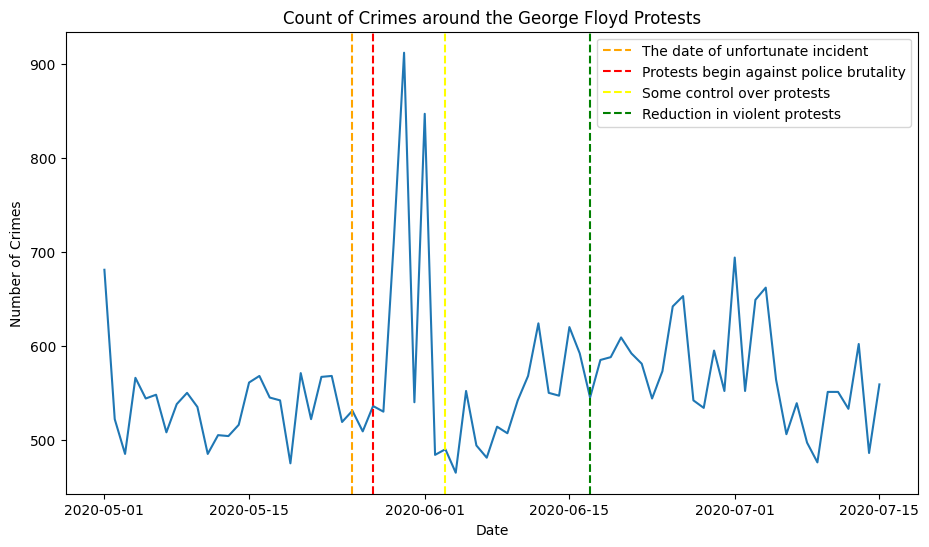

In [106]:
# Filter the data to include only the dates between Feb 13 and October 18, 2020
start_date = pd.Timestamp(2020, 5, 1)
end_date = pd.Timestamp(2020, 7, 15)
filtered_data = data[(data['DATE OCC'] >= start_date) & (data['DATE OCC'] <= end_date)]

# Group the filtered data by date and count the number of crimes for each date
crime_counts = filtered_data.groupby('DATE OCC').size()

# Plot a line chart of the crime counts
plt.figure(figsize=(11, 6))
plt.plot(crime_counts.index, crime_counts.values)
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.title('Count of Crimes around the George Floyd Protests')

# Highlight the points corresponding to the start and end of the lockdown
incident_date = pd.Timestamp(2020, 5, 25)
protests_start = pd.Timestamp(2020, 5, 27)
reduced_protests= pd.Timestamp(2020,6,17)
Undercontrol_protests=pd.Timestamp(2020,6,3)

plt.axvline(x=incident_date, color='orange', linestyle='--', label='The date of unfortunate incident')
plt.axvline(x=protests_start, color='red', linestyle='--', label='Protests begin against police brutality')
plt.axvline(x=Undercontrol_protests, color='yellow', linestyle='--', label="Some control over protests")
plt.axvline(x=reduced_protests, color='green', linestyle='--', label="Reduction in violent protests")
# Add a legend
plt.legend()

plt.show()


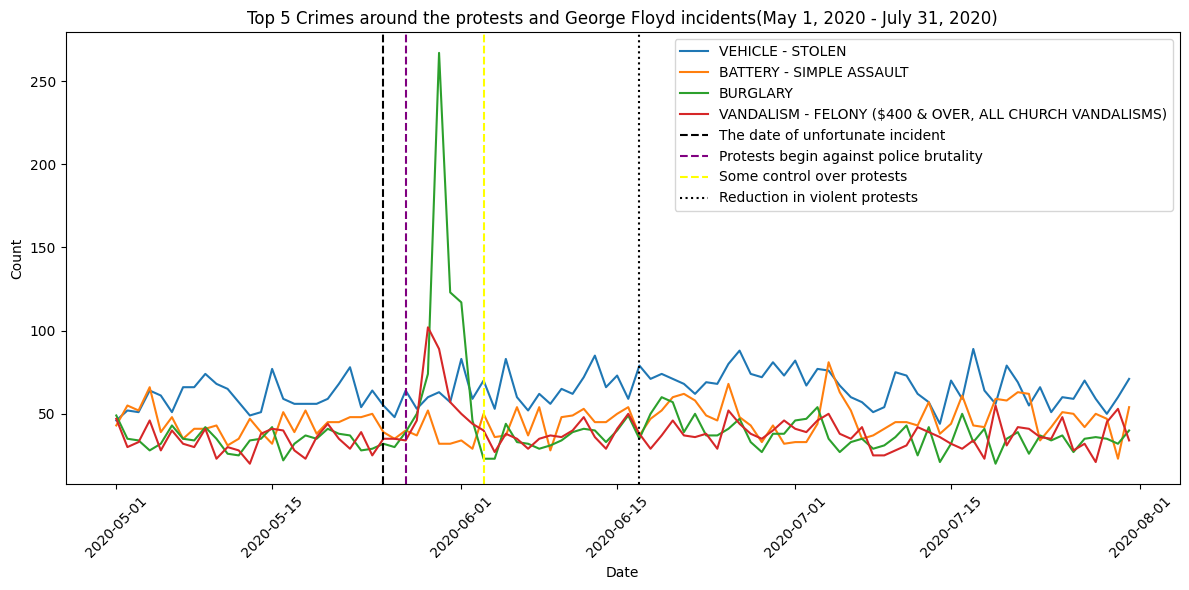

In [107]:
start_date = pd.to_datetime('2020-05-1')
end_date = pd.to_datetime('2020-07-31')
filtered_data = data[(data['DATE OCC'] >= start_date) & (data['DATE OCC'] <= end_date)]

# Group by crime description and count the number of occurrences
top_crimes = filtered_data['Crm Cd Desc'].value_counts().nlargest(4)

# Create a new dataframe for storing the progression data
progression_data = pd.DataFrame(columns=top_crimes.index)

# Iterate over each day in the date range
for day in pd.date_range(start=start_date, end=end_date, freq='D'):
    # Filter the dataframe for the current day
    day_data = filtered_data[filtered_data['DATE OCC'] == day]
    
    # Count the occurrences of each top crime for the current day
    crime_counts = day_data['Crm Cd Desc'].value_counts()
    
    # Fill the progression dataframe with the crime counts for the current day
    progression_data.loc[day] = crime_counts[top_crimes.index].tolist()

# Plot the progression of the top 5 crimes
plt.figure(figsize=(12, 6))


for crime in progression_data.columns:
    plt.plot(progression_data.index, progression_data[crime], label=crime)
    

plt.xlabel('Date')
plt.ylabel('Count')
# Highlight the points corresponding to the start and end of the lockdown
incident_date = pd.Timestamp(2020, 5, 25)
protests_start = pd.Timestamp(2020, 5, 27)
reduced_protests= pd.Timestamp(2020,6,17)
Undercontrol_protests=pd.Timestamp(2020,6,3)

plt.axvline(x=incident_date, color='black', linestyle='--', label='The date of unfortunate incident')
plt.axvline(x=protests_start, color='purple', linestyle='--', label='Protests begin against police brutality')
plt.axvline(x=Undercontrol_protests, color='yellow', linestyle='--', label="Some control over protests")
plt.axvline(x=reduced_protests, color='black', linestyle=':', label="Reduction in violent protests")
# Add a legend
plt.title('Top 5 Crimes around the protests and George Floyd incidents(May 1, 2020 - July 31, 2020)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()